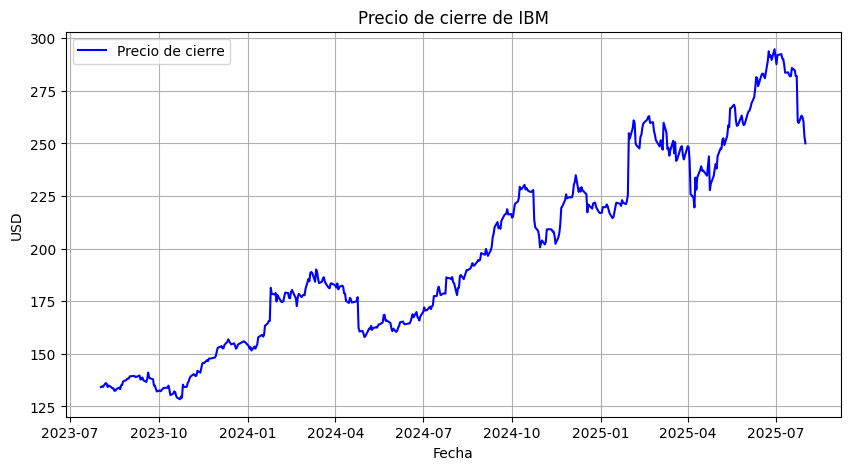

Error al graficar ingresos: 'Ingresos'


<Figure size 800x400 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt

# Verificamos que haya datos
if not stock_data.empty:
    plt.figure(figsize=(10,5))
    plt.plot(stock_data.index, stock_data["Close"], label="Precio de cierre", color="blue")
    plt.title("Precio de cierre de IBM")
    plt.xlabel("Fecha")
    plt.ylabel("USD")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("No hay datos de precios disponibles.")

# Verificamos que haya ingresos
try:
    revenue = ibm.quarterly_financials.loc["Total Revenue"].T
    revenue.columns = ["Ingresos"]
    
    plt.figure(figsize=(8,4))
    plt.plot(revenue.index, revenue["Ingresos"], marker='o', color="green")
    plt.title("Ingresos trimestrales de IBM")
    plt.xlabel("Fecha")
    plt.ylabel("USD")
    plt.grid(True)
    plt.show()
except Exception as e:
    print("Error al graficar ingresos:", e)


In [5]:
import ipywidgets as widgets
from IPython.display import display

# Selector de empresa
ticker_selector = widgets.Dropdown(
    options=['IBM', 'AMZN', 'TSLA', 'MSFT'],
    value='IBM',
    description='Empresa:'
)

# Selector de período
period_selector = widgets.Dropdown(
    options=['6mo', '1y', '2y'],
    value='2y',
    description='Período:'
)

# Botón para actualizar
update_button = widgets.Button(description="Actualizar")

# Función para actualizar gráficos
def update_dashboard(b):
    ticker = yf.Ticker(ticker_selector.value)
    data = ticker.history(period=period_selector.value)
    revenue = ticker.quarterly_financials.loc["Total Revenue"].T
    revenue.columns = ["Ingresos"]

    # Gráfico de precios
    plt.figure(figsize=(10,5))
    plt.plot(data.index, data["Close"], label="Precio de cierre", color="blue")
    plt.title(f"Precio de cierre de {ticker_selector.value}")
    plt.xlabel("Fecha")
    plt.ylabel("USD")
    plt.grid(True)
    plt.show()

    # Gráfico de ingresos
    plt.figure(figsize=(8,4))
    plt.plot(revenue.index, revenue["Ingresos"], marker='o', color="green")
    plt.title(f"Ingresos trimestrales de {ticker_selector.value}")
    plt.xlabel("Fecha")
    plt.ylabel("USD")
    plt.grid(True)
    plt.show()

# Conectar botón
update_button.on_click(update_dashboard)

# Mostrar widgets
display(ticker_selector, period_selector, update_button)


Dropdown(description='Empresa:', options=('IBM', 'AMZN', 'TSLA', 'MSFT'), value='IBM')

Dropdown(description='Período:', index=2, options=('6mo', '1y', '2y'), value='2y')

Button(description='Actualizar', style=ButtonStyle())

### Pregunta 1 - Extracción de datos de acciones de Tesla utilizando yfinance


In [17]:
import yfinance as yf

# Crear el objeto de Tesla
tesla = yf.Ticker("TSLA")

# Extraer los datos históricos
tesla_data = tesla.history(period="max")

# Restablecer el índice
tesla_data.reset_index(inplace=True)

# Mostrar las primeras filas
tesla_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


### Pregunta 2 - Extracción de datos de ingresos de Tesla utilizando Webscraping


In [18]:
import requests
import pandas as pd
from io import StringIO

# URL de Macrotrends
url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"

# Encabezado para simular navegador
headers = {
    "User-Agent": "Mozilla/5.0"
}
# Descargar la página
response = requests.get(url, headers=headers)

# Envolver el HTML en StringIO para evitar el warning
html = StringIO(response.text)

# Leer las tablas
tables = pd.read_html(html)

# Buscar la tabla que contiene los ingresos
for table in tables:
    if "Tesla Quarterly Revenue" in table.to_string():
        tesla_revenue = table
        break

# Mostrar las primeras filas
tesla_revenue.tail()


,Tesla Quarterly Revenue (Millions of US $),Tesla Quarterly Revenue (Millions of US $).1
59,2010-06-30,$28
60,2010-03-31,$21
61,2009-12-31,NaN
62,2009-09-30,$46
63,2009-06-30,$27


### Pregunta 3 - Extracción de datos de acciones de GameStop utilizando yfinance


In [19]:
import yfinance as yf

# Crear el objeto de GameStop
gamestop = yf.Ticker("GME")

# Extraer los datos históricos
gme_data = gamestop.history(period="max")

# Restablecer el índice
gme_data.reset_index(inplace=True)

# Mostrar las primeras filas
gme_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683251,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666417,1.666417,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


### Pregunta 4 - Extracción de datos de ingresos de GameStop utilizando Webscraping


In [20]:
import requests
import pandas as pd
from io import StringIO

# URL de Macrotrends para GameStop
url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"

# Encabezado para simular navegador
headers = {
    "User-Agent": "Mozilla/5.0"
}

# Descargar la página
response = requests.get(url, headers=headers)

# Envolver el HTML en StringIO
html = StringIO(response.text)

# Leer las tablas
tables = pd.read_html(html)

# Buscar la tabla que contiene los ingresos
for table in tables:
    if "GameStop Quarterly Revenue" in table.to_string():
        gme_revenue = table
        break

# Mostrar las últimas cinco filas
gme_revenue.tail()


,GameStop Quarterly Revenue (Millions of US $),GameStop Quarterly Revenue (Millions of US $).1
61,2010-01-31,"$3,524"
62,2009-10-31,"$1,835"
63,2009-07-31,"$1,739"
64,2009-04-30,"$1,981"
65,2009-01-31,"$3,492"


### Pregunta 5 - Tablero de acciones e ingresos de Tesla


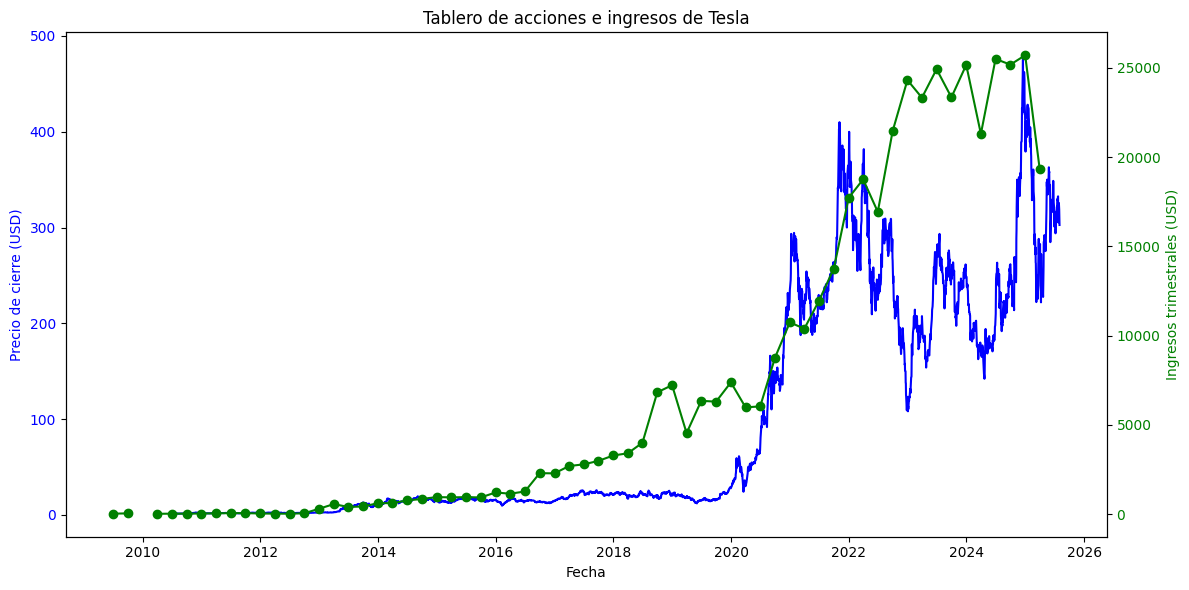

In [15]:
import matplotlib.pyplot as plt

# Limpiar ingresos
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace('[\$,]', '', regex=True).astype(float)

# Asegurar que las fechas estén en formato datetime
tesla_revenue["Date"] = pd.to_datetime(tesla_revenue["Date"])
tesla_data.index = pd.to_datetime(tesla_data.index)

# Crear el gráfico combinado
fig, ax1 = plt.subplots(figsize=(12,6))

# Precio de cierre
ax1.plot(tesla_data.index, tesla_data["Close"], color="blue", label="Precio de cierre")
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Precio de cierre (USD)", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Segundo eje para ingresos
ax2 = ax1.twinx()
ax2.plot(tesla_revenue["Date"], tesla_revenue["Revenue"], color="green", marker='o', label="Ingresos")
ax2.set_ylabel("Ingresos trimestrales (USD)", color="green")
ax2.tick_params(axis='y', labelcolor="green")

# Título y leyenda
plt.title("Tablero de acciones e ingresos de Tesla")
fig.tight_layout()
plt.show()


### Pregunta 6 - Cuadro de mando de acciones e ingresos de GameStop


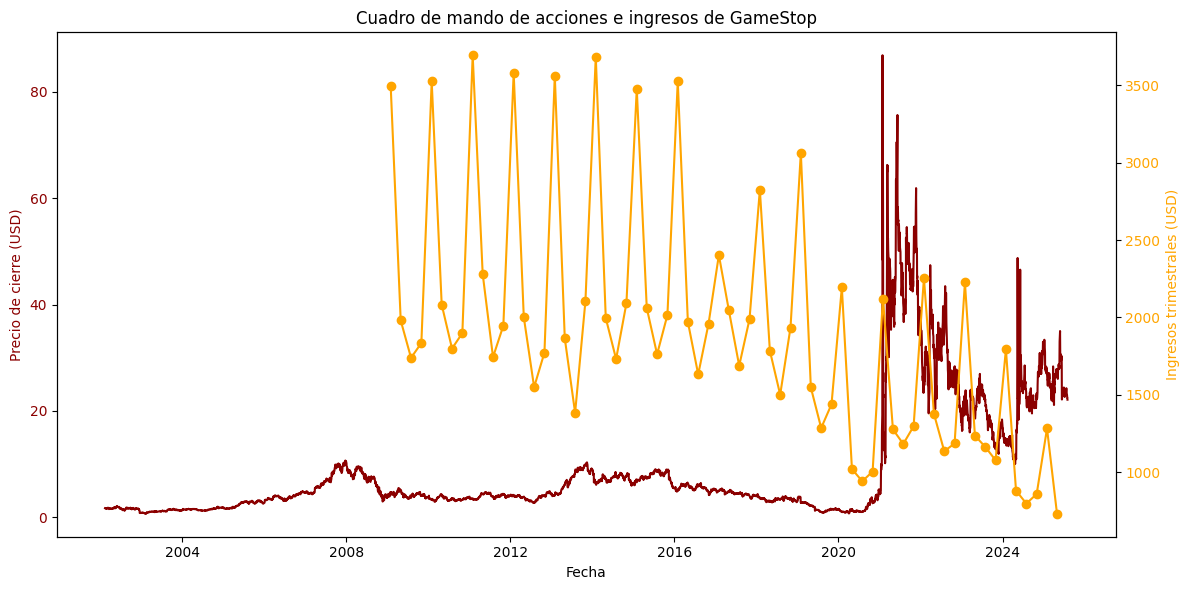

In [16]:
import matplotlib.pyplot as plt
import pandas as pd

# Renombrar columnas si es necesario
gamestop_revenue.columns = ["Date", "Revenue"]

# Limpiar ingresos
gamestop_revenue["Revenue"] = gamestop_revenue["Revenue"].replace('[\$,]', '', regex=True).astype(float)

# Convertir fechas
gamestop_revenue["Date"] = pd.to_datetime(gamestop_revenue["Date"])
gme_data.index = pd.to_datetime(gme_data.index)

# Crear gráfico combinado
fig, ax1 = plt.subplots(figsize=(12,6))

# Precio de cierre
ax1.plot(gme_data.index, gme_data["Close"], color="darkred", label="Precio de cierre")
ax1.set_xlabel("Fecha")
ax1.set_ylabel("Precio de cierre (USD)", color="darkred")
ax1.tick_params(axis='y', labelcolor="darkred")

# Segundo eje para ingresos
ax2 = ax1.twinx()
ax2.plot(gamestop_revenue["Date"], gamestop_revenue["Revenue"], color="orange", marker='o', label="Ingresos")
ax2.set_ylabel("Ingresos trimestrales (USD)", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# Título y leyenda
plt.title("Cuadro de mando de acciones e ingresos de GameStop")
fig.tight_layout()
plt.show()
